In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F


In [2]:
from torch.utils.data import DataLoader
from torchvision import datasets,transforms

In [3]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\Seedevice\anaconda3\envs\pytorchenv\lib\site-packages\sklearn\utils\validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'


In [4]:
#MNIST IMAGE --> Tensors

In [5]:
transform = transforms.ToTensor()

In [6]:
train_data = datasets.MNIST(root='../CNN-Convolutional-Neural-Networks',train =True, download=True, transform=transform)

In [7]:
test_data = datasets.MNIST(root='../CNN-Convolutional-Neural-Networks',train=False, download = True, transform=transform)

In [8]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Split: train
    Root Location: ../CNN-Convolutional-Neural-Networks
    Transforms (if any): ToTensor()
    Target Transforms (if any): None

In [9]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Split: test
    Root Location: ../CNN-Convolutional-Neural-Networks
    Transforms (if any): ToTensor()
    Target Transforms (if any): None

In [10]:
type(train_data)

torchvision.datasets.mnist.MNIST

In [11]:
train_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [12]:
image,label = train_data[0]

In [13]:
image.shape

torch.Size([1, 28, 28])

In [14]:
label

5

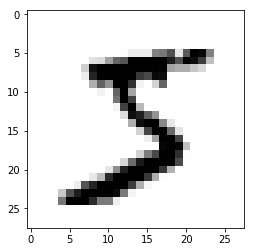

In [15]:
plt.imshow(image.reshape((28,28)), cmap='gist_yarg') #viridis

In [16]:
torch.manual_seed(101)

train_loader = DataLoader(train_data,batch_size = 100, shuffle=True)

test_loader = DataLoader(test_data, batch_size = 500, shuffle = False)

In [17]:
from torchvision.utils import make_grid
np.set_printoptions(formatter=dict(int=lambda x: f'{x:4}'))

In [18]:
# First Batch
for images,labels in train_loader:
    break

In [19]:
images.shape

torch.Size([100, 1, 28, 28])

In [20]:
labels.shape

torch.Size([100])

Labels:  [   0    5    7    8    6    7    9    7    1    3    8    4]


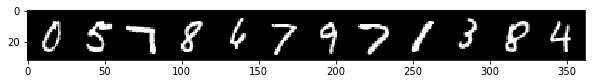

In [21]:
# Print the first 12 labels
print('Labels: ', labels[:12].numpy())

# Print the first 12 images
im = make_grid(images[:12], nrow=12)  # the default nrow is 8
plt.figure(figsize=(10,4))
# We need to transpose the images from CWH to WHC
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

In [22]:
class MultilayerPerceptron(nn.Module):
    
    
    def __init__(self,input_size = 784, output_size = 10, layer = [120,84]):
        super().__init__()
        
        self.fc1 = nn.Linear(input_size, layer[0])
        self.fc2 = nn.Linear(layer[0], layer[1])
        self.fc3 = nn.Linear(layer[1], output_size)
        
        
    def forward(self,X):
        
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        
        return F.log_softmax(X, dim = 1)
        

In [23]:
torch.manual_seed(101)
model = MultilayerPerceptron()
model

MultilayerPerceptron(
  (fc1): Linear(in_features=784, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [24]:
# ANN --> CNN


for param in model.parameters():
    print(param.numel())

94080
120
10080
84
840
10


In [25]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

In [26]:
images.shape

torch.Size([100, 1, 28, 28])

In [27]:
images.view(100,-1).shape

torch.Size([100, 784])

In [28]:
import time
start_time = time.time()

epochs = 10
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        b+=1
        
        # Apply the model
        y_pred = model(X_train.view(100, -1))  # Here we flatten X_train
        loss = criterion(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Print interim results
        if b%200 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{100*b:6}/60000]  loss: {loss.item():10.8f}accuracy: {trn_corr.item()*100/(100*b):7.3f}%')
    
    # Update train loss & accuracy for the epoch
    train_losses.append(loss.detach().numpy())
    train_correct.append(trn_corr)
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):

            # Apply the model
            y_val = model(X_test.view(500, -1))  # Here we flatten X_test

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            tst_corr += (predicted == y_test).sum()
    
    # Update test loss & accuracy for the epoch
    loss = criterion(y_val, y_test)
    test_losses.append(loss.detach().numpy())
    test_correct.append(tst_corr)
        
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed   

epoch:  0  batch:  200 [ 20000/60000]  loss: 0.28055406accuracy:  83.040%
epoch:  0  batch:  400 [ 40000/60000]  loss: 0.20303483accuracy:  87.325%
epoch:  0  batch:  600 [ 60000/60000]  loss: 0.20227623accuracy:  89.323%
epoch:  1  batch:  200 [ 20000/60000]  loss: 0.14457069accuracy:  94.560%
epoch:  1  batch:  400 [ 40000/60000]  loss: 0.10489681accuracy:  95.110%
epoch:  1  batch:  600 [ 60000/60000]  loss: 0.12034713accuracy:  95.347%
epoch:  2  batch:  200 [ 20000/60000]  loss: 0.11627211accuracy:  96.530%
epoch:  2  batch:  400 [ 40000/60000]  loss: 0.08906290accuracy:  96.615%
epoch:  2  batch:  600 [ 60000/60000]  loss: 0.10235450accuracy:  96.740%
epoch:  3  batch:  200 [ 20000/60000]  loss: 0.05358916accuracy:  97.475%
epoch:  3  batch:  400 [ 40000/60000]  loss: 0.05405060accuracy:  97.475%
epoch:  3  batch:  600 [ 60000/60000]  loss: 0.05676333accuracy:  97.513%
epoch:  4  batch:  200 [ 20000/60000]  loss: 0.13540569accuracy:  97.945%
epoch:  4  batch:  400 [ 40000/60000] 

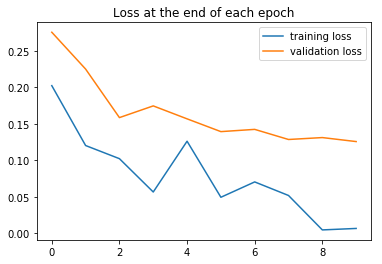

In [29]:
plt.plot(train_losses, label='training loss')
plt.plot(test_losses, label='validation loss')
plt.title('Loss at the end of each epoch')
plt.legend();

In [32]:
train_acc = [t/600 for t in train_correct]

In [33]:
train_acc

[tensor(89),
 tensor(95),
 tensor(96),
 tensor(97),
 tensor(98),
 tensor(98),
 tensor(98),
 tensor(99),
 tensor(99),
 tensor(99)]

In [34]:
test_acc = [t/100 for t in test_correct]

In [35]:
test_acc

[tensor(94),
 tensor(96),
 tensor(96),
 tensor(97),
 tensor(97),
 tensor(97),
 tensor(97),
 tensor(97),
 tensor(97),
 tensor(97)]

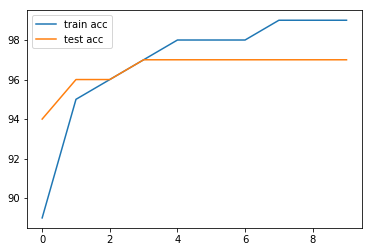

In [39]:
plt.plot(train_acc, label = 'train acc')
plt.plot(test_acc, label = 'test acc')
plt.legend()

In [40]:
test_load_all = DataLoader(test_data, batch_size = 10000, shuffle = False)

In [42]:
with torch.no_grad():
    
    correct = 0
    
    for X_test, y_test in test_load_all:
        y_val = model(X_test.view(len(X_test),-1))
        predicted = torch.max(y_val,1)[1]
        correct += (predicted==y_test).sum()

In [46]:
correct.item()/len(test_data)*100

97.75

In [47]:
confusion_matrix(predicted.view(-1), y_test.view(-1))

array([[ 972,    0,    2,    0,    1,    3,    5,    1,    5,    3],
       [   0, 1121,    2,    0,    0,    0,    4,    3,    0,    2],
       [   1,    5, 1010,    4,    3,    0,    2,    7,    2,    0],
       [   2,    2,    7,  995,    1,   18,    1,    3,    5,   14],
       [   0,    0,    3,    0,  962,    1,    8,    0,    2,   12],
       [   0,    0,    0,    2,    0,  861,    2,    0,    3,    3],
       [   1,    2,    1,    0,    3,    4,  936,    0,    1,    0],
       [   1,    1,    5,    4,    4,    0,    0, 1009,    4,   11],
       [   2,    4,    2,    4,    2,    5,    0,    4,  950,    5],
       [   1,    0,    0,    1,    6,    0,    0,    1,    2,  959]],
      dtype=int64)